In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import sys
import os
from catGP import preprocess_data, OMGP
from catSC import Linear_Scaling
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (8.0, 15.0)

In [14]:
'''data_format = [metadata, slab_d0, slab_d1, bimetal_fp, 
                  ads_d0_unscaled, ads_d1_unscaled, ads_d2_unscaled, SS_unscaled,
                  ads_d0_scaled, ads_d1_scaled, ads_d2_scaled, SS_scaled,
                  energy, energy_A]'''

def get_data(A):
    data = np.load('../Fingerprint_Generation/{}_data.npy'.format(A))[()]
    y = np.array([i[-2] for i in data])
    X = np.vstack([np.hstack([i[1].reshape(-1), 
                              i[2].reshape(-1),
                              i[3].reshape(-1), 
                              i[4].reshape(-1),
                              i[5].reshape(-1),
                              i[6].reshape(-1),
                              i[7].reshape(-1),
                              i[8].reshape(-1),
                              i[9].reshape(-1),
                              i[10].reshape(-1),
                              i[11].reshape(-1)]) for i in data])
    return X, y

In [15]:
d1 = ['SD0', 'SD1', 'AD0U', 'AD1U', 'AD2U', 'SSU', 
      'AD0S', 'AD1S', 'AD2S', 'SSS']
p1 = ['atomic_number', 'atomic_radius', 'dband_center_slab',
      'dband_width_slab', 'dband_skewness_slab', 'dband_kurtosis_slab',
      'dipole_polarizability', 'electron_affinity', 'heat_of_formation',
      'specific_heat']
p2 = ['atomic_number', 'atomic_radius', 'dband_center_slab',
      'dband_width_slab', 'dipole_polarizability', 'electron_affinity',
      'heat_of_formation', 'specific_heat', 'en_allen']

fp_list = [i + '_' +j for j in p1 for i in d1]
fp_list += ['BF_' + i for i in p2]
print(len(fp_list))

109


Working on adsorbates: CH
Best alpha using built-in LassoCV: 0.000237
Best score using built-in LassoCV: 0.898330
Lasso picked 31 variables and eliminated the other 16 variables


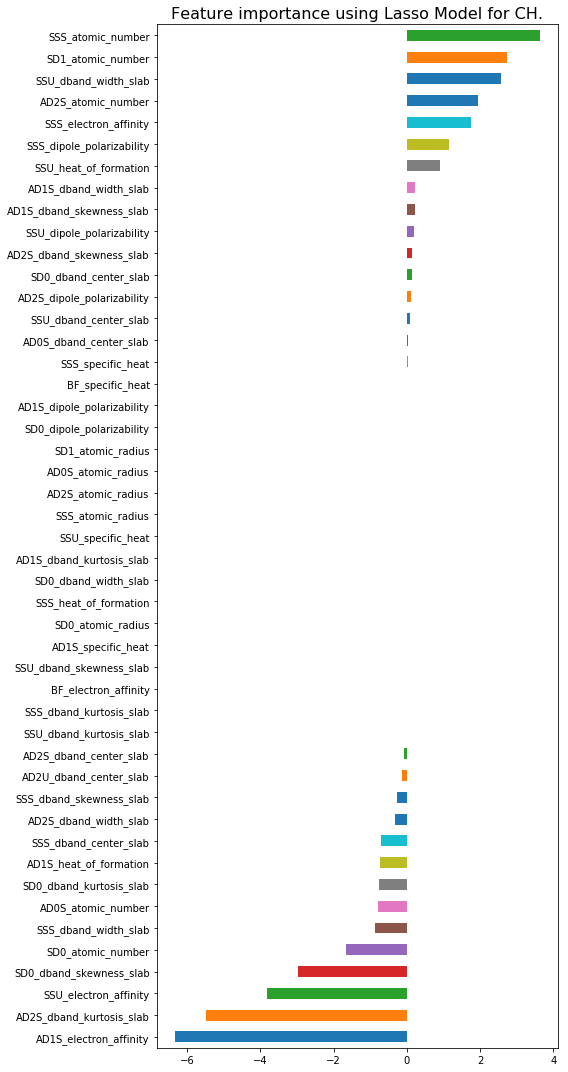

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: CH
MAE_train: [0.08622267 0.07428576 0.16016435]
MAE_train mean: 0.1068909295474016
MAE_train std: 0.03798390658605274
MAE_test: [0.15105904 0.15288944 0.23679104]
MAE_test mean: 0.180246506451209
MAE_test std: 0.03999000389884631

Working on adsorbates: CH2
Best alpha using built-in LassoCV: 0.007827
Best score using built-in LassoCV: 0.639489
Lasso picked 8 variables and eliminated the other 39 variables


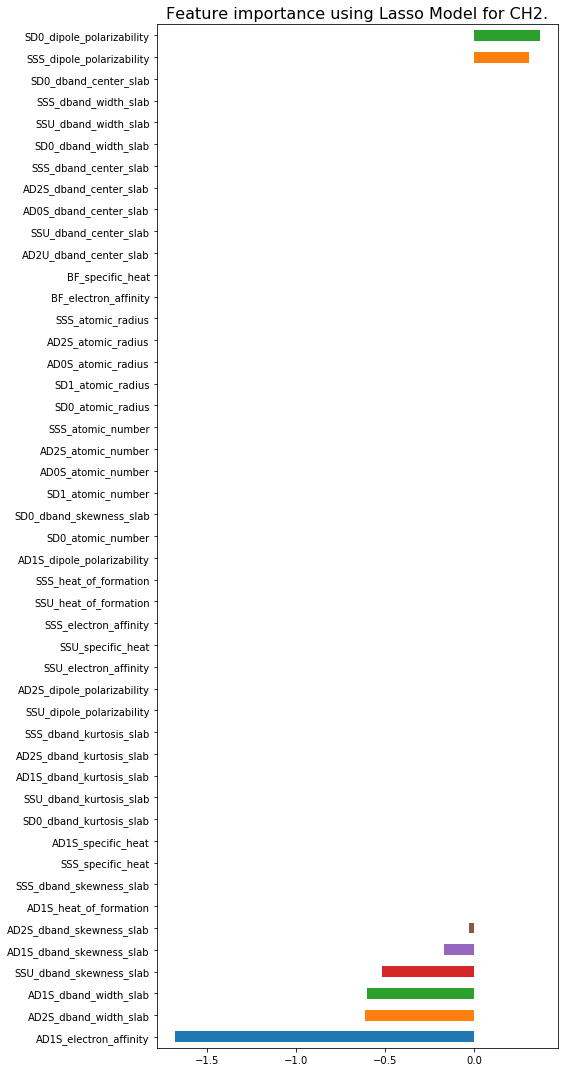

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: CH2
MAE_train: [0.22925802 0.2165026  0.20452225]
MAE_train mean: 0.21676095775402196
MAE_train std: 0.01009999188169475
MAE_test: [0.23505355 0.28404067 0.32132358]
MAE_test mean: 0.2801392684356598
MAE_test std: 0.03532746960017041

Working on adsorbates: CH3
Best alpha using built-in LassoCV: 0.000080
Best score using built-in LassoCV: 0.665524
Lasso picked 37 variables and eliminated the other 10 variables


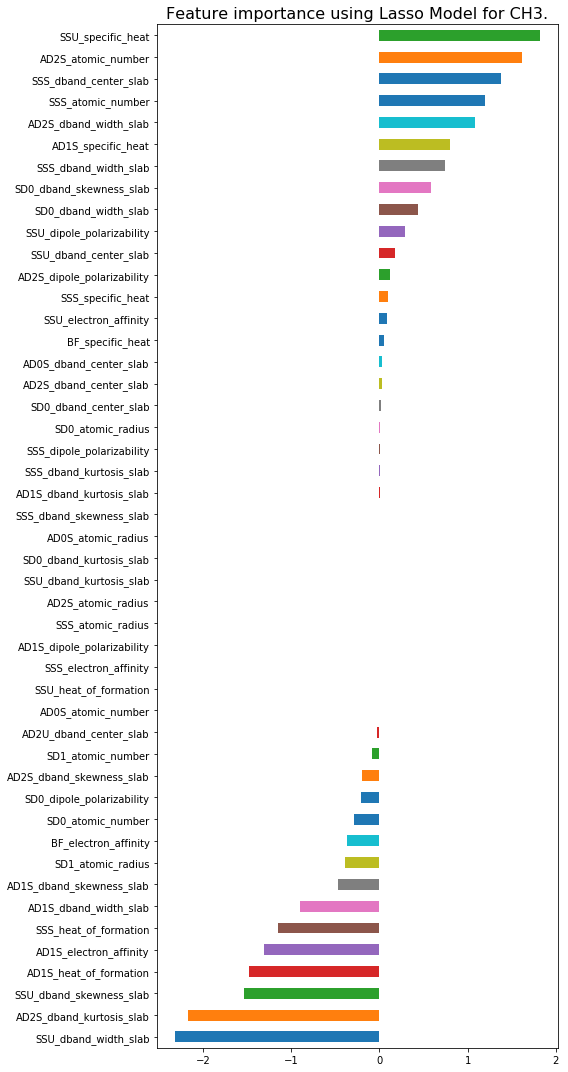

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: CH3
MAE_train: [0.12814088 0.12855773 0.12706375]
MAE_train mean: 0.1279207874262507
MAE_train std: 0.0006294579019745978
MAE_test: [0.18057815 0.16781728 0.17001878]
MAE_test mean: 0.1728047360997953
MAE_test std: 0.0055696294651360395

Working on adsorbates: OH
Best alpha using built-in LassoCV: 0.001391
Best score using built-in LassoCV: 0.742939
Lasso picked 18 variables and eliminated the other 30 variables


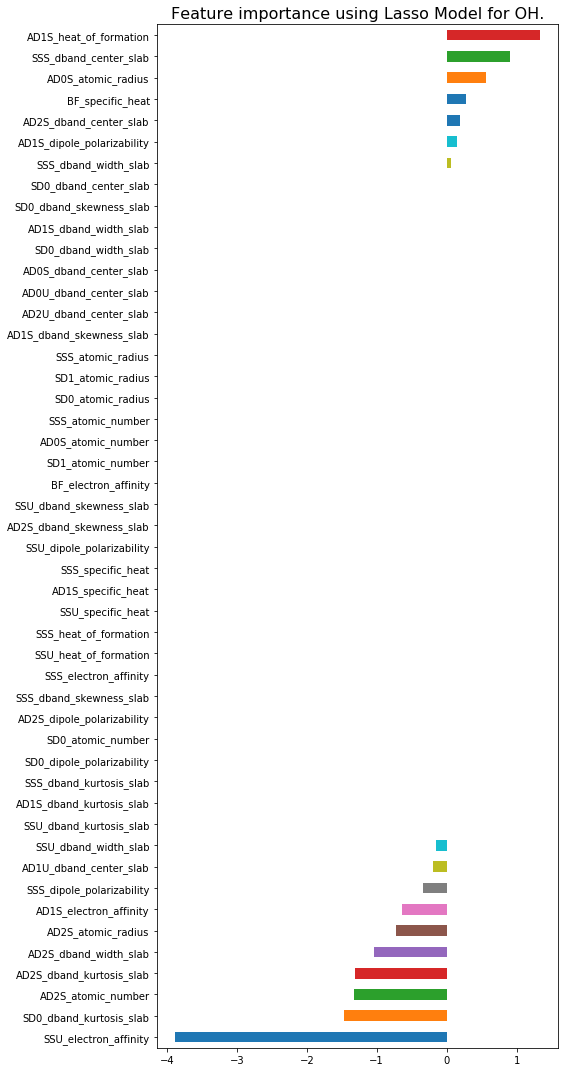

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: OH
MAE_train: [0.09419596 0.10315757 0.1011232 ]
MAE_train mean: 0.09949224263678004
MAE_train std: 0.003836027319393267
MAE_test: [0.15164246 0.14763255 0.15493305]
MAE_test mean: 0.1514026891378447
MAE_test std: 0.0029852347787041214

Working on adsorbates: NH
Best alpha using built-in LassoCV: 0.000506
Best score using built-in LassoCV: 0.887714
Lasso picked 28 variables and eliminated the other 19 variables


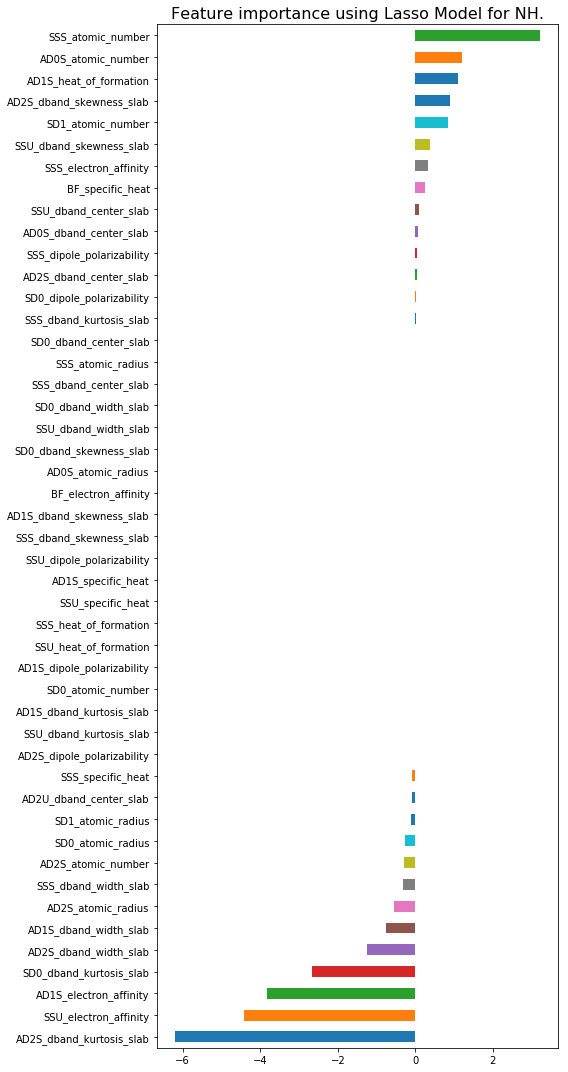

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: NH
MAE_train: [0.13022314 0.14254329 0.13697788]
MAE_train mean: 0.13658143711631196
MAE_train std: 0.0050374881767933765
MAE_test: [0.18015932 0.19806264 0.18001428]
MAE_test mean: 0.18607874786868028
MAE_test std: 0.008474101341883316

Working on adsorbates: SH
Best alpha using built-in LassoCV: 0.006891
Best score using built-in LassoCV: 0.595578
Lasso picked 8 variables and eliminated the other 39 variables


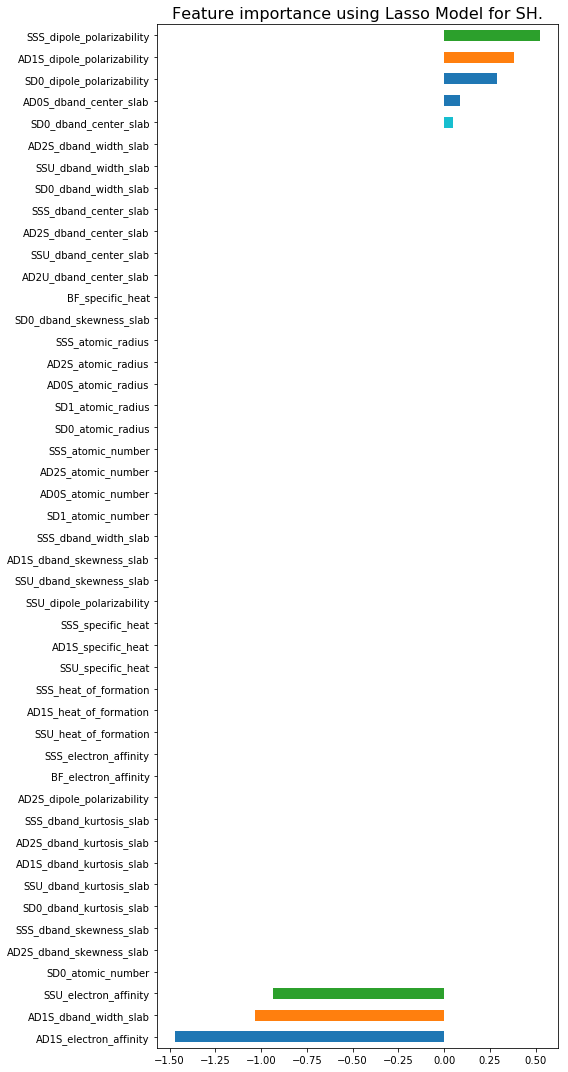

    Working on random state: 10
    Working on random state: 20
    Working on random state: 42

Data for adsorbate: SH
MAE_train: [0.2287011  0.22295304 0.23336244]
MAE_train mean: 0.22833886095293085
MAE_train std: 0.004257332584346487
MAE_test: [0.25671401 0.2716042  0.26439601]
MAE_test mean: 0.26423806908777053
MAE_test std: 0.006079920212307758



In [16]:
adsorbates = ['CH', 'CH2', 'CH3', 'OH', 'NH', 'SH']

for ads in adsorbates:
    f_list = fp_list.copy()
    print('Working on adsorbates: {}'.format(ads))
    X, y = get_data(ads)
    data = preprocess_data(X, y, fp_list)
    data.clean_data()
    X, y, f_list = data.get_data()
    reg = LassoCV()
    reg.fit(X, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y))
    coef = pd.Series(reg.coef_, index = f_list)
    print("Lasso picked " + str(sum(coef != 0)) + 
          " variables and eliminated the other " +  
          str(sum(coef == 0)) + " variables")
    imp_coef = coef.sort_values()
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model for {}.".format(ads), fontsize=16)
    plt.tight_layout()
    #plt.xlabel(fontsize=16)
    #plt.ylabel(fontsize=16)
    #plt.yticks(fontsie=16)
    plt.savefig('feature_imp_{}.png'.format(ads))
    plt.show()
    mask = [i for i, f in enumerate(f_list) 
            if abs(getattr(imp_coef, f, 0)) != 0]
    mask_l = [f for i, f in enumerate(f_list) 
            if abs(getattr(imp_coef, f, 0)) != 0]
    np.save('{}_fp.npy'.format(ads), mask_l)
    X = X[:, mask]
    assert X.shape[1] == sum(coef!=0)
    kernel_recipe = {'ConstantKernel' : [{'RBF' : [1.0,
                                                   {'length_scale' : 1.0}]},
                                      {'constant_value' : 1.0,
                                       'constant_value_bounds' : (3e-7, 3e7)}],
                     'WhiteKernel' : {'noise_level' : 0.1,
                                      'noise_level_bounds' : (1e-5, 1e5)}}

    r_state = [10, 20, 42]
    #r_state = [42]
    r_data = {rs : {} for rs in r_state}
    for rs in r_state:
        print('    Working on random state: {}'.format(rs))
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            train_size=0.80, 
                                                            random_state=rs)

        MLGP = OMGP(X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test,
                    kernel_recipe=kernel_recipe)

        MLGP.run_GP()
        r_data[rs] = MLGP.__dict__


    if not os.path.exists('run_{}'.format(ads)):
        os.mkdir('run_{}'.format(ads))

    
    MAE_train = np.array([r_data[k]['MAE_train'] for k in r_data])
    MAE_test = np.array([r_data[k]['MAE_test'] for k in r_data])
    
    print('\nData for adsorbate: {}'.format(ads))
    print('MAE_train: {}'.format(MAE_train))
    print('MAE_train mean: {}'.format(MAE_train.mean()))
    print('MAE_train std: {}'.format(MAE_train.std()))
    print('MAE_test: {}'.format(MAE_test))
    print('MAE_test mean: {}'.format(MAE_test.mean()))
    print('MAE_test std: {}\n'.format(MAE_test.std()))
    


    
  